# 🎓: 2️⃣0️⃣0️⃣3️⃣0️⃣3️⃣7️⃣

# 📦 Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Symbol, exp

# 🔖 **Z-Transform Functions**

1. **Exponential Sequence**:
   $a^n u[n]$:
   $$X(z) = \frac{z}{z-a}, \quad |z| > |a|$$

2. **Sum of Exponentials**:
   $(a_1^n + a_2^n)u[n]$:
   $$X(z) = \frac{z}{z-a_1} + \frac{z}{z-a_2}, \quad |z| > \max(|a_1|, |a_2|)$$

3. **Sinusoidal Sequence**:
   $\sin(\omega n)u[n]$:
   $$X(z) = \frac{z\sin(\omega)}{z^2 - 2z\cos(\omega) + 1}, \quad |z| > 1$$

For the specific sequences in given question:

1. $3^n u[n] \xrightarrow{\mathcal{Z}} \frac{z}{z-3}, \quad |z| > 3$

2. $2^n u[n] + 3^n u[n] \xrightarrow{\mathcal{Z}} \frac{z}{z-2} + \frac{z}{z-3}, \quad |z| > 3$

3. $e^{-0.2n} u[n] \xrightarrow{\mathcal{Z}} \frac{z}{z-e^{-0.2}}, \quad |z| > e^{-0.2}$

4. $\sin(\frac{\pi}{4}n)u[n] \xrightarrow{\mathcal{Z}} \frac{z\sin(\frac{\pi}{4})}{z^2 - 2z\cos(\frac{\pi}{4}) + 1}, \quad |z| > 1$

In [2]:
def get_z_transform(sequence_type, *params):
    """Calculate Z-transform for different sequences"""
    z = Symbol('z')

    if sequence_type == "exponential":
        a = params[0]
        transform = z / (z - a)
        roc = f"|z| > {abs(a)}"
    elif sequence_type == "sum_exponential":
        a1, a2 = params
        max_a = max(abs(a1), abs(a2))
        transform = z/(z - a1) + z/(z - a2)
        roc = f"|z| > {max_a}"
    elif sequence_type == "sinusoidal":
        w = params[0]
        transform = z * np.sin(w) / (z**2 - 2*z*np.cos(w) + 1)
        roc = "|z| > 1"

    return transform, roc

# 📊 Plotting Function

In [3]:
def plot_roc(roc_condition):
    """Simple ROC plot"""
    # Extract radius value from ROC condition
    if 'max' in roc_condition:
        # Handle case with max() in ROC
        numbers = [float(x.strip()) for x in roc_condition.split('>')[-1].strip('max() ').split(',')]
        radius = max(numbers)
    else:
        # Handle simple case
        radius = float(roc_condition.split('>')[-1].strip())

    theta = np.linspace(0, 2*np.pi, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    plt.figure(figsize=(4, 4))
    plt.plot(x, y, 'r--', label='ROC Boundary')
    plt.grid(True)
    plt.axis('equal')
    plt.title(f'ROC: {roc_condition}')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

def plot_frequency_response(z_transform, show_magnitude=True, show_phase=True):
    """
    Plot frequency response with toggleable magnitude and phase
    """
    theta = np.linspace(0, 2*np.pi, 500)
    z_values = np.exp(1j * theta)
    z = Symbol('z')

    response = [complex(z_transform.subs(z, z_val)) for z_val in z_values]
    magnitude = np.abs(response)
    phase = np.angle(response)

    if show_magnitude or show_phase:
        if show_magnitude and show_phase:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

            ax1.plot(theta, magnitude)
            ax1.set_title('Magnitude Response')
            ax1.set_xlabel('Frequency (radians)')
            ax1.set_ylabel('Magnitude')
            ax1.grid(True)

            ax2.plot(theta, phase)
            ax2.set_title('Phase Response')
            ax2.set_xlabel('Frequency (radians)')
            ax2.set_ylabel('Phase (radians)')
            ax2.grid(True)

            plt.tight_layout()

        elif show_magnitude:
            plt.figure(figsize=(4, 4))
            plt.plot(theta, magnitude)
            plt.title('Magnitude Response')
            plt.xlabel('Frequency (radians)')
            plt.ylabel('Magnitude')
            plt.grid(True)

        else:  # show_phase only
            plt.figure(figsize=(6, 4))
            plt.plot(theta, phase)
            plt.title('Phase Response')
            plt.xlabel('Frequency (radians)')
            plt.ylabel('Phase (radians)')
            plt.grid(True)

        plt.show()


# ⁉️ Questions and Solver function

In [4]:
def solver(header, sequence_type, show_mag_phase=True, *params):
    """Solve and plot Z-transform for different sequences"""
    print(header)
    transform, roc = get_z_transform(sequence_type, *params)
    print(f"Z-transform: {transform}")
    print(f"ROC: {roc}")
    plot_roc(roc)
    plot_frequency_response(transform, show_magnitude=show_mag_phase, show_phase=show_mag_phase)

## 1️⃣
> $3^nu(n)$



1. Sequence: 3^n*u[n]
Z-transform: z/(z - 3)
ROC: |z| > 3


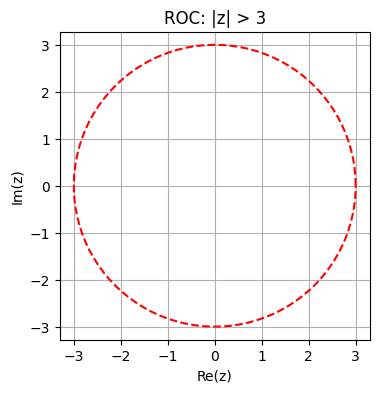

In [5]:
solver("1. Sequence: 3^n*u[n]", "exponential", False, 3)

## 2️⃣
> $2^nu(n) + 3^nu(n)$

2. Sequence: 2^n*u[n] + 3^n*u[n]
Z-transform: z/(z - 2) + z/(z - 3)
ROC: |z| > 3


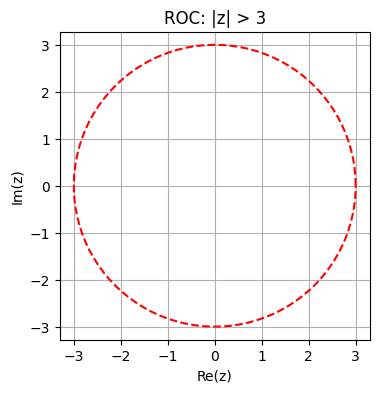

In [6]:
solver("2. Sequence: 2^n*u[n] + 3^n*u[n]", "sum_exponential", False, 2, 3)

## 3️⃣
> $e^{-0.2n}u(n)$

3. Sequence: e^(-0.2n)*u[n]
Z-transform: z/(z - 0.818730753077982)
ROC: |z| > 0.8187307530779818


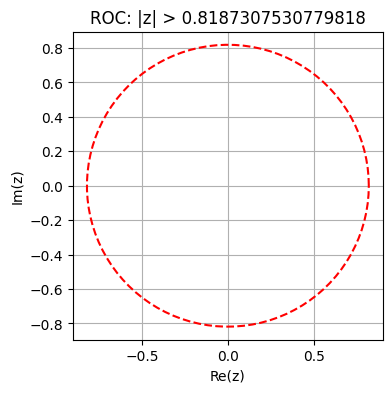

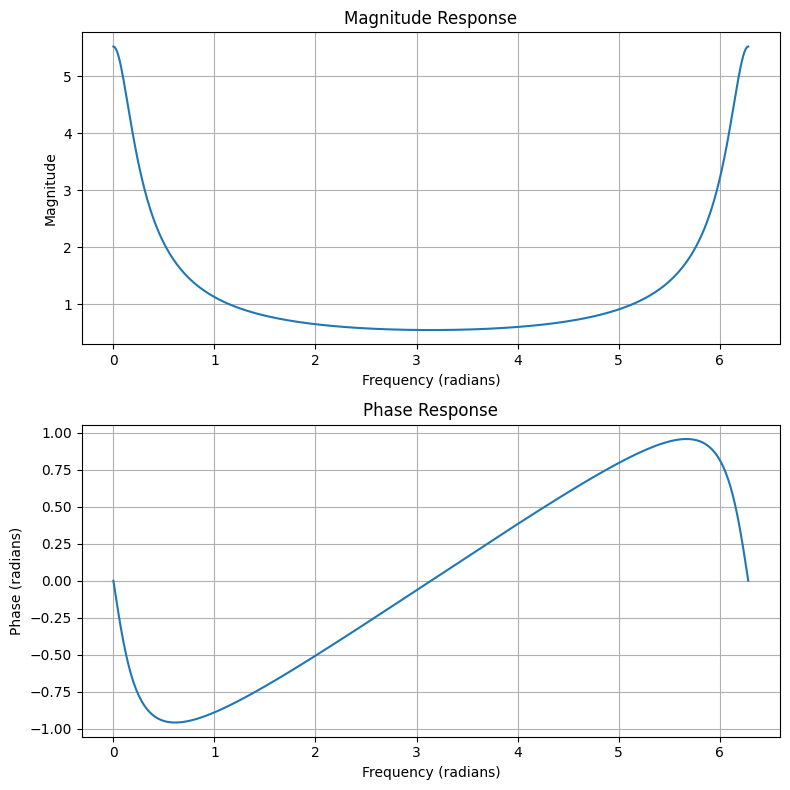

In [7]:
solver("3. Sequence: e^(-0.2n)*u[n]", "exponential", True, np.exp(-0.2))

## 4️⃣
> $sin{\frac{πn}{4}}u(n)$

4. Sequence: sin(πn/4)u[n]
Z-transform: 0.707106781186547*z/(z**2 - 1.4142135623731*z + 1)
ROC: |z| > 1


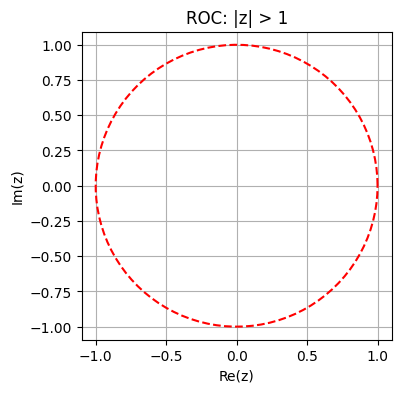

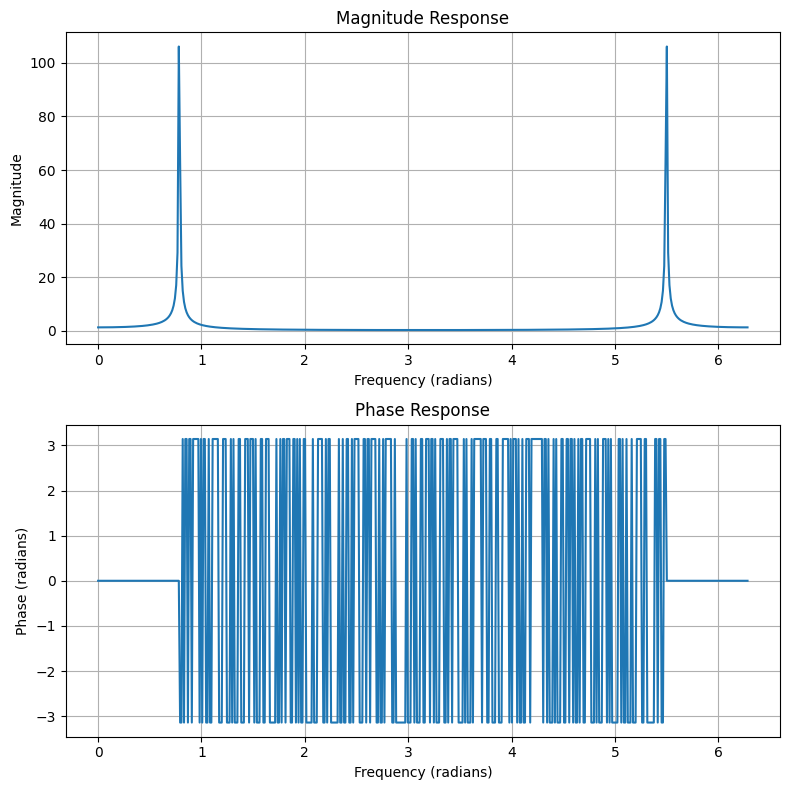

In [8]:
solver("4. Sequence: sin(πn/4)u[n]", "sinusoidal", True, np.pi/4)